In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

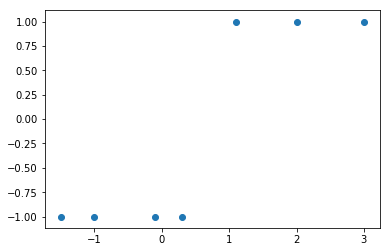

In [33]:
data = np.loadtxt('/Users/outrageous/Workspace/Metis_MachineLearningCourse/chi17_ml1/level_2/datasets/1d_logistic_data_v1.csv',delimiter=' ')
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

plt.scatter(x,y)

In [34]:
def compute_cost_val(x,y,w):
    P = len(y)
    cost = 0
    for p in range(P):
        x_p = list(x[p])
        x_p.insert(0,1)
        x_p = np.array(x_p)
        x_p.shape = (len(x_p),1)
        
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*np.dot(x_p.T,w)))
    return cost[0]

# function for computing the logistic regression cost gradient
def compute_gradient(x,y,w):
    # produce gradient for each class weights
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = list(x[p])
        x_p.insert(0,1)
        x_p = np.array(x_p)
        x_p.shape = (len(x_p),1)
        
        y_p = y[p]
        grad+= -1/(1 + np.exp(y_p*np.dot(x_p.T,w)))*y_p*x_p
    
    grad.shape = (len(grad),1)
    return grad

# gradient descent loop
def grad_descent(x,y,alpha,K,w0):
    w = w0
    
    # create container to record weights
    whist = []
    
    # descent loop
    for k in range(K):
        # record current weight
        whist.append(w)
        
        # compute derivative
        grad = compute_gradient(x,y,w)
        
        # take descent step
        w = w - alpha*grad
        
    return whist

In [40]:
# inputs to gradient descent
w0 = 2*np.random.rand(2,1) - 1
alpha = 10**-1
K = 1000

# run gradient descent
whist = grad_descent(x,y,alpha,K,w0)

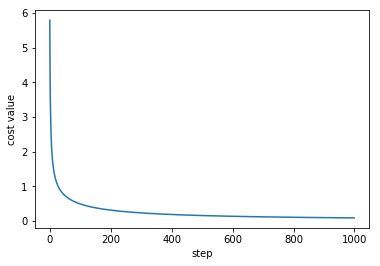

In [41]:
# compute the associated ccst function values
ghist = []
for w in whist:
    g = compute_cost_val(x,y,w)
    ghist.append(g)
ghist = np.array(ghist)
ghist.shape = (len(ghist),1)
plt.plot(ghist)
plt.xlabel('step')
plt.ylabel('cost value')
plt.show()

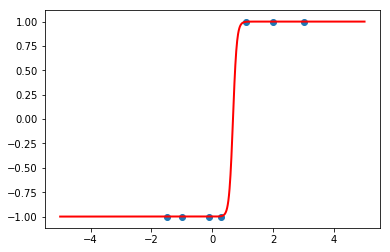

In [45]:
# now lets plot the points and line
plt.scatter(x,y)
s = np.linspace(-5,5,1000)
w = whist[-1]
t = np.tanh(w[0] + w[1]*s)
plt.plot(s,t,c = 'r',linewidth = 2)
plt.show()